In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("B:\exel\DelhiHousePrice.csv")

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
df.head(15)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0000,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0000,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0000,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0000,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0000,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0000,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0000,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0000,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [5]:
df.tail(15)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1244,1350.0,3,2.0,Semi-Furnished,"Nehru Enclave, Kalkaji",1.0,17500000,Ready_to_move,Resale,Builder_Floor,6878.0
1245,2625.0,4,5.0,Semi-Furnished,Chittaranjan Park,2.0,60000000,Ready_to_move,New_Property,Builder_Floor,6878.0
1246,1800.0,4,4.0,Semi-Furnished,Chittaranjan Park,2.0,40000000,Ready_to_move,New_Property,Builder_Floor,6878.0
1247,125.0,3,3.0,Semi-Furnished,Chittaranjan Park,2.0,11500000,Ready_to_move,New_Property,Builder_Floor,6878.0
1248,1440.0,3,3.0,Semi-Furnished,Chittaranjan Park,2.0,22500000,Ready_to_move,New_Property,Builder_Floor,6878.0
1249,1900.0,3,4.0,Semi-Furnished,Chittaranjan Park,2.0,28500000,Ready_to_move,New_Property,Builder_Floor,6878.0
1250,1800.0,3,3.0,Semi-Furnished,Chittaranjan Park,2.0,29000000,Ready_to_move,Resale,Builder_Floor,6878.0
1251,1200.0,3,2.0,Semi-Furnished,Chittaranjan Park,1.0,15500000,Ready_to_move,Resale,Builder_Floor,12916.0
1252,1800.0,3,3.0,Semi-Furnished,"Nehru Enclave, Kalkaji",1.0,26000000,Ready_to_move,Resale,Builder_Floor,12916.0
1253,1200.0,3,3.0,Semi-Furnished,Chittaranjan Park,1.0,16500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
df.shape

(1259, 11)

In [8]:
print("Initial Data Overview:")
print(df.describe())

Initial Data Overview:
               Area          BHK     Bathroom      Parking         Price  \
count   1259.000000  1259.000000  1257.000000  1226.000000  1.259000e+03   
mean    1466.452724     2.796664     2.556086     1.935563  2.130670e+07   
std     1568.055040     0.954425     1.042220     6.279212  2.560115e+07   
min       28.000000     1.000000     1.000000     1.000000  1.000000e+06   
25%      800.000000     2.000000     2.000000     1.000000  5.700000e+06   
50%     1200.000000     3.000000     2.000000     1.000000  1.420000e+07   
75%     1700.000000     3.000000     3.000000     2.000000  2.550000e+07   
max    24300.000000    10.000000     7.000000   114.000000  2.400000e+08   

            Per_Sqft  
count    1018.000000  
mean    15690.136542  
std     21134.738568  
min      1259.000000  
25%      6364.000000  
50%     11291.500000  
75%     18000.000000  
max    183333.000000  


In [9]:
df = df.dropna()

In [10]:
df = df.drop_duplicates()

In [11]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]

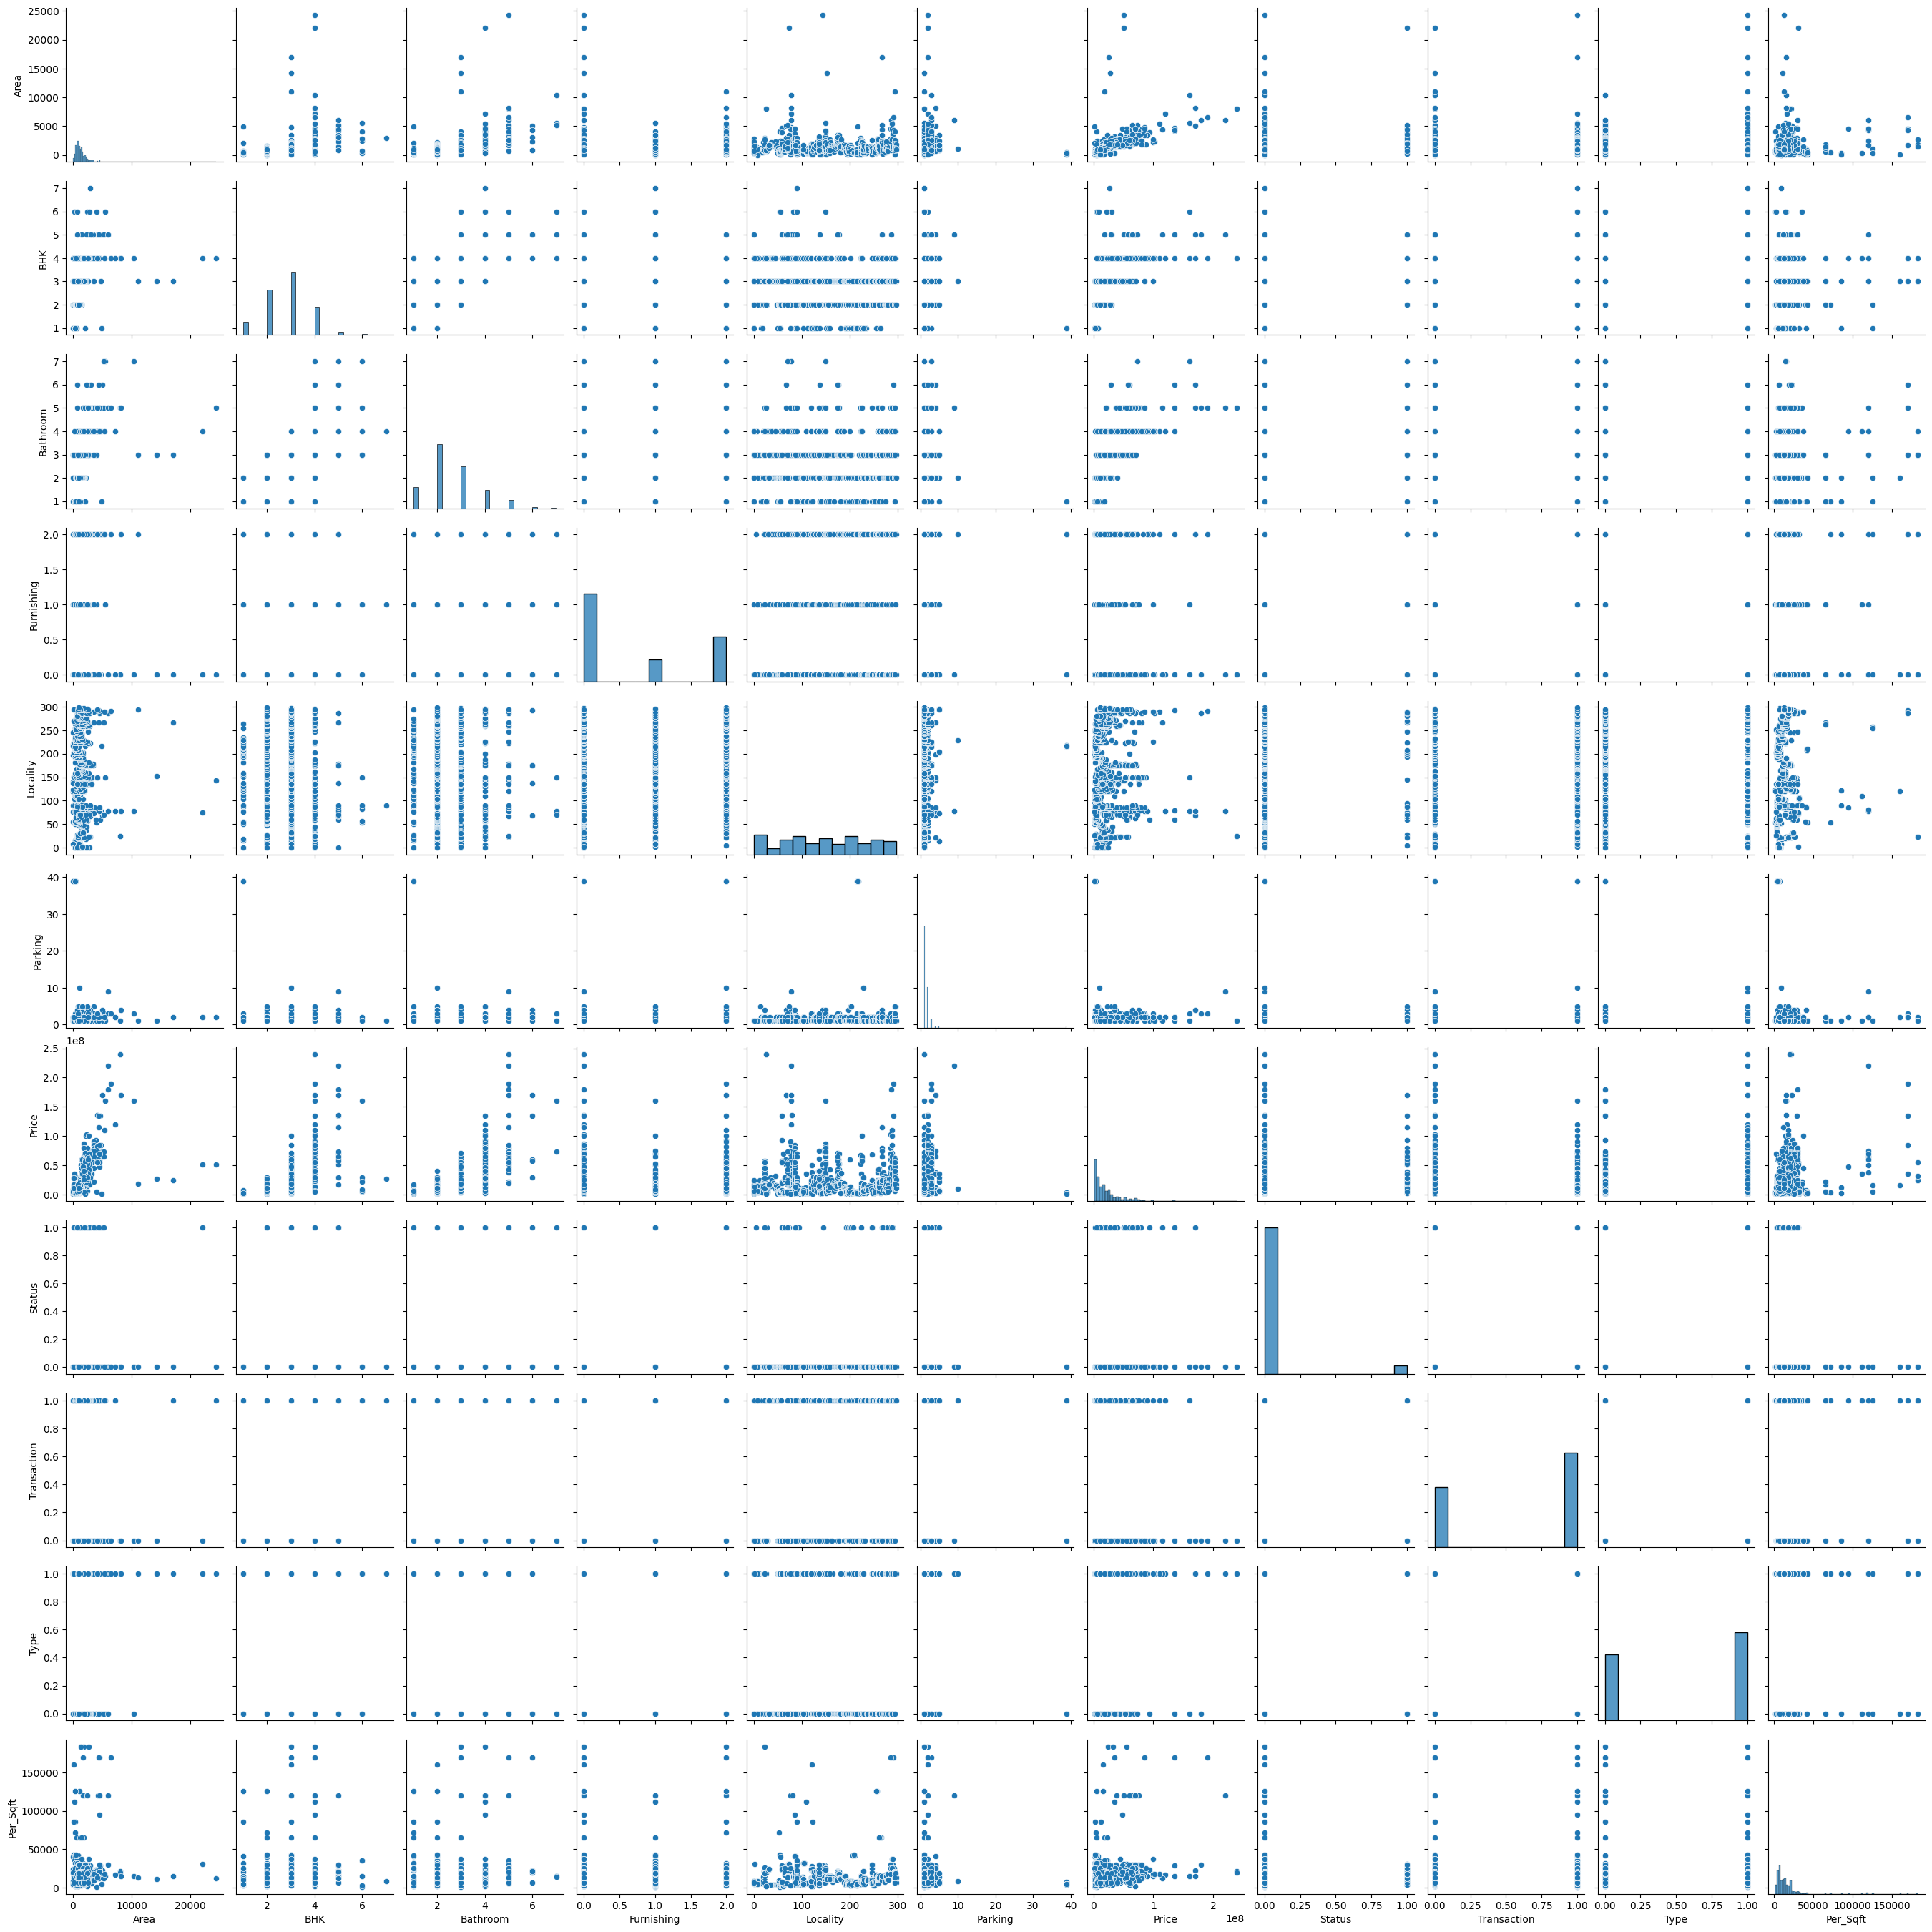

In [13]:
sns.pairplot(df)
plt.show()

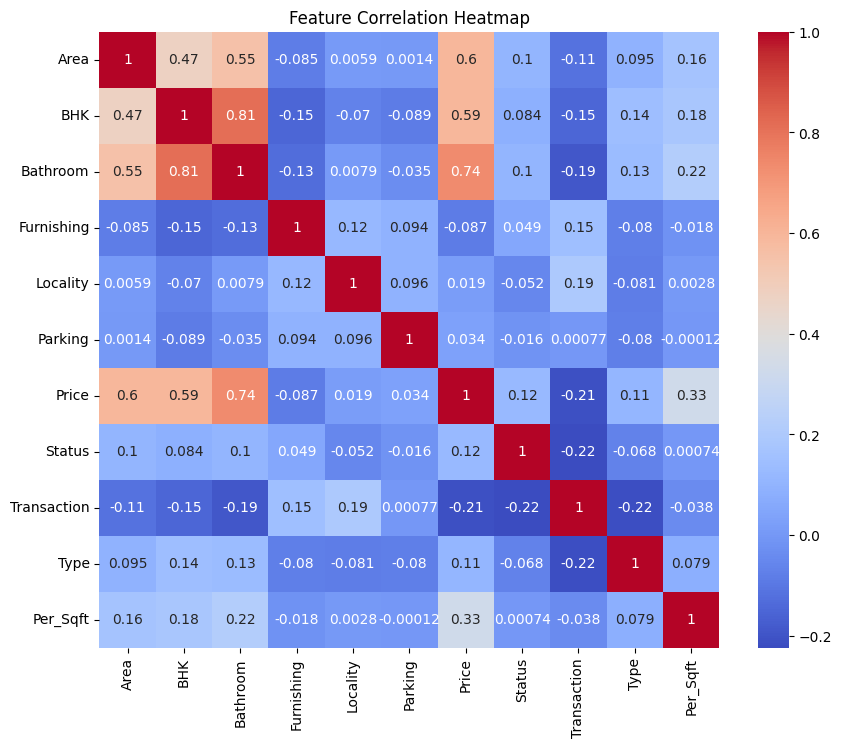

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [15]:
X = df.drop('Price', axis=1)  
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
X_train

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
6,1350.0,4,3.0,0,2,1.0,0,1,1,6667.0
73,1700.0,4,3.0,2,37,1.0,0,1,0,3524.0
332,747.0,2,2.0,1,90,1.0,0,1,1,8701.0
1204,2000.0,3,3.0,2,288,2.0,0,1,0,30000.0
409,360.0,1,1.0,0,112,1.0,0,0,1,6584.0
...,...,...,...,...,...,...,...,...,...,...
142,875.0,2,2.0,2,22,1.0,0,0,1,7000.0
325,1650.0,4,3.0,1,87,1.0,1,0,0,3901.0
1132,1800.0,3,3.0,1,276,1.0,0,1,1,15278.0
554,1300.0,3,3.0,0,143,3.0,0,1,1,6944.0


In [17]:
Y_train

6       10000000
73      20500000
332      6500000
1204    37500000
409      2000000
          ...   
142     15000000
325     14000000
1132    27500000
554     22500000
138     26000000
Name: Price, Length: 748, dtype: int64

In [18]:
X_test

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
381,715.0000,2,2.0,2,103,1.0,0,1,0,5666.0
102,1500.0000,3,3.0,0,23,1.0,0,1,1,26666.0
255,8150.0000,4,5.0,2,78,4.0,0,0,1,15459.0
879,50.0000,1,1.0,2,216,39.0,0,0,0,5128.0
914,100.0000,3,2.0,0,224,1.0,0,1,1,14888.0
...,...,...,...,...,...,...,...,...,...,...
1118,2250.0000,3,3.0,0,267,2.0,0,1,0,11905.0
3,600.0000,2,2.0,0,2,1.0,0,1,1,6667.0
577,1550.0000,3,3.0,0,150,1.0,0,0,1,14818.0
396,540.0000,2,2.0,0,111,1.0,0,0,1,6111.0


In [19]:
Y_test

381       5600000
102      40000000
255     170000000
879       3500000
914      17000000
          ...    
1118     20500000
3         4200000
577      38000000
396       2600000
525      21500000
Name: Price, Length: 188, dtype: int64

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression Results:")
print("R-squared:", r2_score(Y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, lr_predictions))

Linear Regression Results:
R-squared: 0.5183879962976969
Mean Squared Error: 501831100514886.2


In [21]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree Results:")
print("R-squared:", r2_score(Y_test, dt_predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, dt_predictions))


Decision Tree Results:
R-squared: 0.8062943080170081
Mean Squared Error: 201837869148936.16


In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("R-squared:", r2_score(Y_test, rf_predictions))
print("Mean Squared Error:", mean_squared_error(Y_test, rf_predictions))


Random Forest Results:
R-squared: 0.7786466532968284
Mean Squared Error: 230646231250017.7


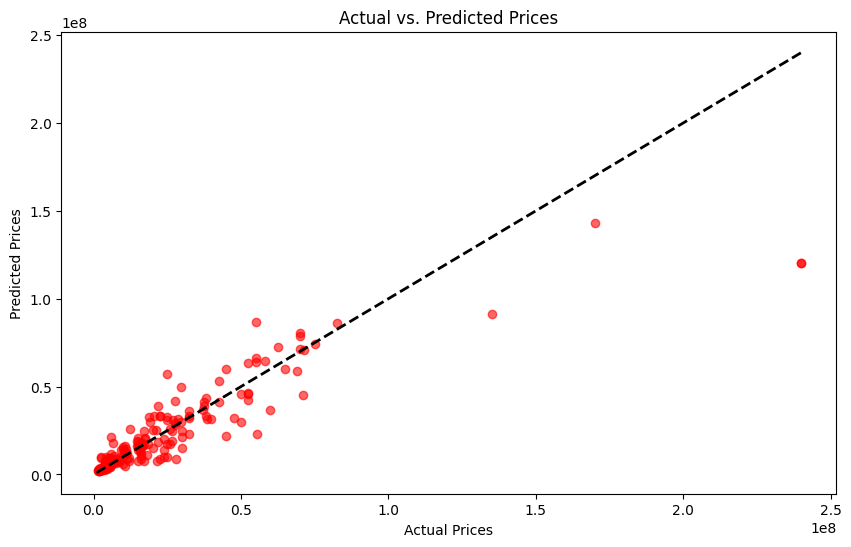

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_predictions, alpha=0.6, color='red')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [24]:
import pickle
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, Y_train)

with open('house_price_model.pkl','wb') as file:
    pickle.dump(model_dt, file)
    print("Model Saved Successsfully")

Model Saved Successsfully


In [25]:
#data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit scaler on training data
X_train=sc.fit_transform(X_train)

#transform testing data
X_test=sc.transform(X_test)

In [26]:
with open('scdelhi.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

In [29]:
import os

# Streamlit code as a string
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained model and scaler
with open('house_price_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Delhi House Price Prediction App')

# Input fields
st.subheader("Enter the property details:")
area = st.number_input('Area (in sq. ft.)', min_value=0.0, max_value=10000.0, value=1000.0, step=10.0)
bhk = st.number_input('Number of Bedrooms (BHK)', min_value=1, max_value=10, value=2, step=1)
bathroom = st.number_input('Number of Bathrooms', min_value=1, max_value=10, value=1, step=1)
furnishing = st.selectbox('Furnishing', ['Unfurnished', 'Semi-Furnished', 'Fully-Furnished'])
locality = st.selectbox('Locality', ['South Delhi', 'North Delhi', 'East Delhi', 'West Delhi', 'Central Delhi'])
parking = st.number_input('Number of Parking Spaces', min_value=0, max_value=5, value=1, step=1)
status = st.selectbox('Status', ['Ready to Move', 'Under Construction'])
transaction = st.selectbox('Transaction Type', ['New Property', 'Resale'])
property_type = st.selectbox('Property Type', ['Apartment', 'Independent House', 'Villa', 'Builder Floor'])
per_sqft = st.number_input('Per Square Foot Rate (₹)', min_value=0.0, max_value=100000.0, value=5000.0, step=100.0)

# Encoding categorical features
furnishing_encoded = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Fully-Furnished': 2}[furnishing]
locality_encoded = {
    'South Delhi': 0,
    'North Delhi': 1,
    'East Delhi': 2,
    'West Delhi': 3,
    'Central Delhi': 4
}[locality]
status_encoded = {'Ready to Move': 0, 'Under Construction': 1}[status]
transaction_encoded = {'New Property': 0, 'Resale': 1}[transaction]
property_type_encoded = {
    'Apartment': 0,
    'Independent House': 1,
    'Villa': 2,
    'Builder Floor': 3
}[property_type]

# Prepare the feature vector
features = np.array([[area, bhk, bathroom, furnishing_encoded, locality_encoded, parking, status_encoded, transaction_encoded, property_type_encoded, per_sqft]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict the house price
predicted_price = model.predict(features_scaled)

# Display the result
st.write(f'Predicted House Price: ₹{predicted_price[0]:,.2f}')
import streamlit as st
import pickle
import numpy as np

# Load the trained model and scaler
with open('house_price_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Delhi House Price Prediction App')

# Input fields
st.subheader("Enter the property details:")
area = st.number_input('Area (in sq. ft.)', min_value=0.0, max_value=10000.0, value=1000.0, step=10.0)
bhk = st.number_input('Number of Bedrooms (BHK)', min_value=1, max_value=10, value=2, step=1)
bathroom = st.number_input('Number of Bathrooms', min_value=1, max_value=10, value=1, step=1)
furnishing = st.selectbox('Furnishing', ['Unfurnished', 'Semi-Furnished', 'Fully-Furnished'])
locality = st.selectbox('Locality', ['South Delhi', 'North Delhi', 'East Delhi', 'West Delhi', 'Central Delhi'])
parking = st.number_input('Number of Parking Spaces', min_value=0, max_value=5, value=1, step=1)
status = st.selectbox('Status', ['Ready to Move', 'Under Construction'])
transaction = st.selectbox('Transaction Type', ['New Property', 'Resale'])
property_type = st.selectbox('Property Type', ['Apartment', 'Independent House', 'Villa', 'Builder Floor'])
per_sqft = st.number_input('Per Square Foot Rate (₹)', min_value=0.0, max_value=100000.0, value=5000.0, step=100.0)

# Encoding categorical features
furnishing_encoded = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Fully-Furnished': 2}[furnishing]
locality_encoded = {
    'South Delhi': 0,
    'North Delhi': 1,
    'East Delhi': 2,
    'West Delhi': 3,
    'Central Delhi': 4
}[locality]
status_encoded = {'Ready to Move': 0, 'Under Construction': 1}[status]
transaction_encoded = {'New Property': 0, 'Resale': 1}[transaction]
property_type_encoded = {
    'Apartment': 0,
    'Independent House': 1,
    'Villa': 2,
    'Builder Floor': 3
}[property_type]

# Prepare the feature vector
features = np.array([[area, bhk, bathroom, furnishing_encoded, locality_encoded, parking, status_encoded, transaction_encoded, property_type_encoded, per_sqft]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict the house price
predicted_price = model.predict(features_scaled)

# Display the result
st.write(f'Predicted House Price: ₹{predicted_price[0]:,.2f}')
"""
file_path = os.path.join('C:\\Users\\Saura', 'housepricepredictionapp.py')

try:
    
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")

File 'C:\Users\Saura\housepricepredictionapp.py' has been saved.
